# Homework 2
-   **Name:**  Victor Hugo Gomez Soto 
-  **e-mail:** -- victor.gomez2701@alumnos.udg.mx --


# MODULES

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import wrapcauchy, levy_stable
import math
from scipy.stats import cauchy



# CLASSES

In [118]:
# Clase Vec2d para manejar vectores 2D
class Vec2d:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __add__(self, other):
        return Vec2d(self.x + other.x, self.y + other.y)
    
    def rotated(self, angle):
        cos_a = np.cos(angle)
        sin_a = np.sin(angle)
        return Vec2d(self.x * cos_a - self.y * sin_a, self.x * sin_a + self.y * cos_a)
    
    def to_tuple(self):
        return (self.x, self.y)

# Activity 1: Correlated Random Walk - 1 Trajectory

In [119]:
def correlated_random_walk(n_steps=1000, scale=1.0):
    pos = Vec2d(0, 0)
    trajectory = [pos.to_tuple()]
    
    for i in range(n_steps):
        angle = cauchy.rvs(scale=scale)  # Generar un ángulo con distribución de Cauchy
        step = Vec2d(1, 0).rotated(angle)
        pos += step
        trajectory.append(pos.to_tuple())

    print("Primeros 5 puntos de la trayectoria:", trajectory[:5])  # Verifica si hay datos

    x, y = zip(*trajectory)
    
    print("Cantidad de puntos generados:", len(x))  # Debe ser n_steps + 1

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='CRW 1 Trajectory'))
    fig.show()

# Llamada de prueba
correlated_random_walk()

Primeros 5 puntos de la trayectoria: [(0, 0), (np.float64(0.9280897505929607), np.float64(0.37235656949259804)), (np.float64(1.8753143921052349), np.float64(0.6929271210283622)), (np.float64(2.660173834132755), np.float64(0.07325329048502738)), (np.float64(3.5801696093179696), np.float64(0.4651815666292176))]
Cantidad de puntos generados: 1001


# Activity 2: Lévy Distribution - N Different Curves

In [120]:
alphas = [0.5, 1.0, 1.5, 2.0]
x_vals = np.linspace(-5, 5, 1000)
fig = go.Figure()
for alpha in alphas:
    pdf_vals = levy_stable.pdf(x_vals, alpha, 0)
    fig.add_trace(go.Scatter(x=x_vals, y=pdf_vals, mode='lines', name=f'alpha={alpha}'))
fig.show()


# Activity 3: Lévy Distribution - Histogram + Curve

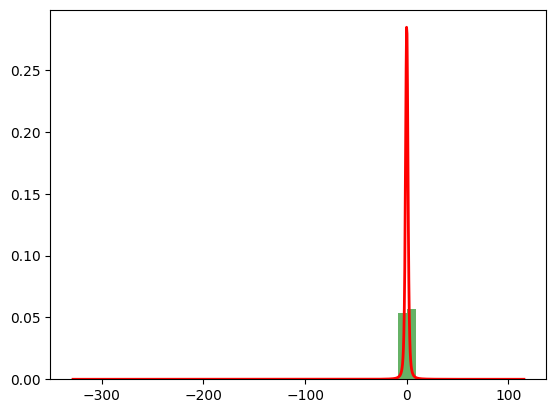

In [121]:
samples = levy_stable.rvs(1.5, 0, size=10000)
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')
x_vals = np.linspace(min(samples), max(samples), 1000)
pdf_vals = levy_stable.pdf(x_vals, 1.5, 0)
plt.plot(x_vals, pdf_vals, 'r-', lw=2)
plt.show()


# Activity 4: Lévy Flight - Vec2d - 1 Trajectory

In [122]:
def levy_flight(n_steps=1000, alpha=1.5, scale=1.0):
    pos = Vec2d(0, 0)
    trajectory = [pos.to_tuple()]

    for i in range(n_steps):
        step_size = np.abs(levy_stable.rvs(alpha, 0, scale=scale))  # Tamaño del paso con Lévy
        angle = cauchy.rvs(scale=scale)  # Generar un ángulo con distribución de Cauchy
        step = Vec2d(step_size, 0).rotated(angle)
        pos += step
        trajectory.append(pos.to_tuple())

    print("Primeros 5 puntos de la trayectoria:", trajectory[:5])  # Verifica si hay datos

    x, y = zip(*trajectory)
    z = np.linspace(0, 1, len(x))  # Crear un eje Z para la visualización 3D
    
    print("Cantidad de puntos generados:", len(x))  # Debe ser n_steps + 1

    fig = go.Figure()
    fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Lévy Flight'))
    fig.show()

# Llamada de prueba
levy_flight()


Primeros 5 puntos de la trayectoria: [(0, 0), (np.float64(0.9595390293916136), np.float64(0.11931495323971854)), (np.float64(1.5486151405943023), np.float64(0.20271479331362358)), (np.float64(0.39348805824971067), np.float64(-0.6614231613801429)), (np.float64(0.8546769975244217), np.float64(-1.4226495172255307))]
Cantidad de puntos generados: 1001


# Activity 5: Correlated Random Walk - Vec2d - N Trajectories

In [123]:
def multiple_crw(n_traj=5, n_steps=1000, scale=1.0):
    fig = go.Figure()

    for i in range(n_traj):
        pos = Vec2d(0, 0)
        trajectory = [pos.to_tuple()]
        
        for _ in range(n_steps):
            angle = cauchy.rvs(scale=scale * (i + 1))  # Diferente coeficiente de Cauchy para cada trayectoria
            step = Vec2d(1, 0).rotated(angle)
            pos += step
            trajectory.append(pos.to_tuple())

        x, y = zip(*trajectory)
        z = np.full(len(x), i)  # Usamos un valor fijo de Z para separar las trayectorias en 3D

        fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name=f'CRW {i+1}'))

    print(f"Generadas {n_traj} trayectorias con {n_steps} pasos cada una.")
    
    fig.update_layout(title="Multiple Correlated Random Walks",
                      scene=dict(zaxis_title="Trajectory ID"),
                      showlegend=True)
    fig.show()

# Llamada de prueba
multiple_crw()


Generadas 5 trayectorias con 1000 pasos cada una.


# Correlated Random Walks and Lévy Flights

## **Exercise 1: Correlated Random Walk (CRW)**
### **What is it?**  
A **Correlated Random Walk** (CRW) is a type of random walk where each step is influenced by the previous one. Unlike a purely random movement, in CRW the turns have some **correlation**, meaning the trajectory is not completely erratic.

### **How does it work?**
1. **Trajectory generation:**  
   - We start at position `(0,0)`.
   - A list is created to store trajectory points.

2. **Movement generation:**  
   - At each step, a **random angle** is drawn from the **Cauchy distribution** (this distribution allows occasional large turns).
   - A **movement vector** is calculated based on this angle.
   - The new vector is added to the previous position.

3. **Visualization:**  
   - The generated points are stored in `x` and `y` lists.
   - The trajectory is plotted using `plotly` in 2D.

### **What is it used for?**
- **Animal and robotic search models:**  
  - Many animals (like ants and seabirds) follow similar strategies when searching for food.
  - Autonomous robots can use CRW to efficiently explore areas.
  
- **Disease propagation models:**  
  - CRW is used to simulate how diseases spread among moving populations.

- **Human mobility studies:**  
  - Helps model movement patterns in cities to optimize **traffic flow and transportation systems**.

### **Real-world example:**  
Imagine a drone exploring an area to detect radio signals. If it moved in completely random directions, it would take longer to cover the area efficiently. A **CRW** allows it to maintain some coherence in its trajectory, improving exploration.

---

## **Exercise 4: Lévy Flight**
### **What is it?**  
A **Lévy flight** is a special type of random walk where most steps are small, but **occasionally** a large jump occurs. This allows the trajectory to efficiently cover large areas.

### **How does it work?**
1. **Each step has a random size** drawn from the **Lévy distribution**.
2. **The step direction is random**, simulating an exploratory flight.
3. **The trajectory is plotted in 3D using `plotly`**.

### **What is it used for?**
- **Optimization of search strategies in nature:**  
  - Animals like **sharks, seabirds, and monkeys** have been observed following Lévy flight patterns when searching for food.
  - Inspired **AI search algorithms** for data exploration.

- **Financial models:**  
  - Used in economics to describe abrupt movements in stock markets (price jumps in financial data).

- **Wireless network design:**  
  - Helps optimize **sensor placement** and **signal distribution** in wireless networks.

### **Real-world example:**  
If you are looking for a restaurant in a new city, you might walk for a while in one area, but if you don’t find anything interesting, you **make a big jump** to another location. This is how many animals search for food in nature.

---

## **Exercise 5: Multiple Correlated Random Walks (N CRW Trajectories)**
### **What is it?**  
Here we generate **multiple correlated random walks**, each with a different coefficient. This allows us to **compare how different levels of randomness affect movement**.

### **How does it work?**
1. **Multiple trajectories are generated**, each with a different randomness level.
2. **Each trajectory uses a different Cauchy coefficient.**
3. **All are visualized together in a 3D plot using `plotly`.**

### **What is it used for?**
- **Comparison of search strategies:**  
  - If several people are exploring a forest, some might walk in straight paths, while others might take more turns. This experiment helps compare different search strategies.

- **Diffusion and transport models:**  
  - Used in **physics** to model how **particles or molecules** move in turbulent environments.

- **Optimization in artificial intelligence:**  
  - Some **AI algorithms** use this type of strategy to **efficiently explore** possible solutions.

### **Real-world example:**  
Imagine a group of **robots exploring Mars** for signs of water. Some will follow straight paths, while others will explore more freely. This model helps study **which strategy is more efficient**.
